In [7]:
# chi를 통한 키워드
chi_except_1 = ['date','윤석열','세금','일본','선거','지지율','무당']
chi_except_2 = ['date','윤석열','세금','일본','전과']
chi_except = ['date','윤석열','세금','일본']

# f-test를 통한 키워드
u_except_1 = ['date','부동산','유승민','일본','군대','자영업자','전과','토론']
u_except_2 =['date','민주당','구속','이낙연','검찰','유동규','북한','국회','부동산','문재인','세금','감옥','게이트','단일화','유승민','조작','조사','일본','미국','정책','선거','정치','문제','대표','군대','중국','사기','공약','자영업자','경제','김건희',
             '전과','도박','페미','토론','김혜경']
u_except =  ['date','부동산','유승민','일본','군대','자영업자','전과','토론']         

In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

no_1 = './granger_data_no1.csv'
no_2 = './granger_data_no2.csv'

no1 = pd.read_csv(no_1,header = 0)
no2= pd.read_csv(no_2,header = 0)

no1 = no1.drop(u_except,axis = 1)
no2 = no2.drop(u_except,axis = 1)

# rate1 과 rate2 비율 둘다 같이 학습시
no1.rename(columns = {'rate': 'rate1'},inplace=True)
no2.rename(columns = {'rate': 'rate2'},inplace=True)

both = no1
both
both['rate2'] = no2['rate2']



In [9]:
both.columns

Index(['rate1', '이재명', '윤석열', '국민의힘', '민주당', '특검', '사퇴', '홍준표', '대장동', '박근혜',
       '구속', '이낙연', '검찰', '유동규', '북한', '국회', '여론조작', '수사', '대선후보', '문재인',
       '정권교체', '세금', '감옥', '게이트', '단일화', '조작', '안철수', '조사', '미국', '정책', '선거',
       '정치', '이준석', '김종인', '교체', '연기', '문제', '대표', '지지율', '단일화.1', '중국', '사기',
       '공약', '경제', '김건희', '무당', '도박', '페미', '김혜경', 'rate2'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50980 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49437 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50676 missing from current font.
  font.set_

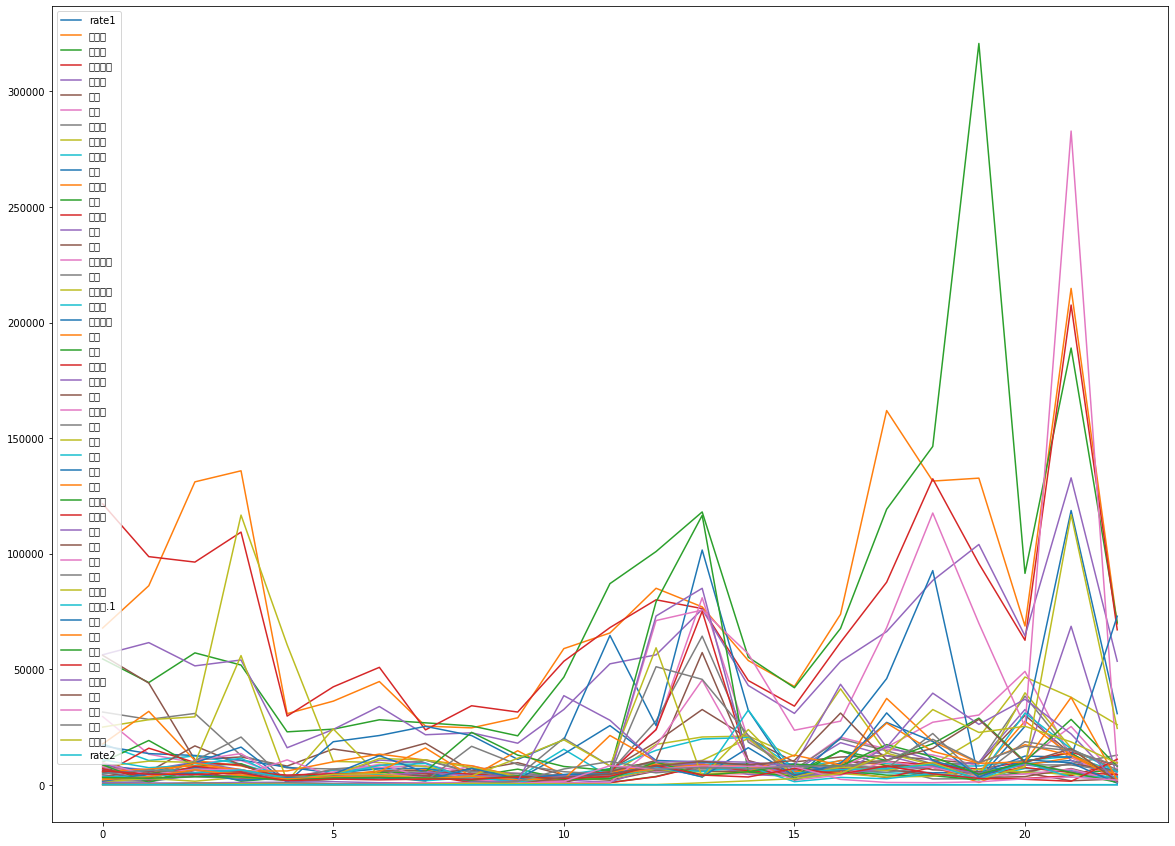

In [10]:
both.plot(figsize=(20, 15))


## 정상성 (Stationary time series)

In [11]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

In [12]:
def adf_test(y):
  print("Results of Augmented Dickey-fuller test: ")
  dftest = adfuller(y, autolag= "AIC")
  dfoutput = pd.Series(dftest[0:4],index =['test statistic', 'p-value', '# of lags', "# of observations"])
  for key, value in dftest[4].items():
    dfoutput['Critical value ({})'.format(key)] = value
  print(dfoutput)

# 1차 차분

In [13]:
adf_test(both['대장동'])

Results of Augmented Dickey-fuller test: 
test statistic          -2.884121
p-value                  0.047226
# of lags                0.000000
# of observations       22.000000
Critical value (1%)     -3.769733
Critical value (5%)     -3.005426
Critical value (10%)    -2.642501
dtype: float64


In [14]:
both_diff = both.diff().dropna()

In [15]:
adf_test(both_diff['대장동'])

Results of Augmented Dickey-fuller test: 
test statistic          -5.465344
p-value                  0.000002
# of lags                2.000000
# of observations       19.000000
Critical value (1%)     -3.832603
Critical value (5%)     -3.031227
Critical value (10%)    -2.655520
dtype: float64


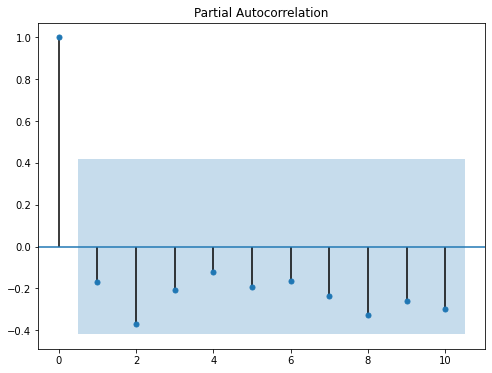

In [16]:
# x축은 시차 y 축은 autocorrelation

fig = plt.figure(figsize=(8,6))
fig.set_facecolor('white')
ax = fig.add_subplot()
sm.graphics.tsa.plot_pacf(both_diff['대장동'], lags=10, ax=ax)
plt.show()

# VAR 2 Modeling

In [ ]:
# 11월 2주차 - 3월 2주차까지 예측 결과 
for temp in range(18,0,-1):
  train = both_diff.iloc[:-temp,:]
  test = both_diff.iloc[-temp: , :]
  forecasting_model = VAR(train)
  results_aic = []
  results = forecasting_model.fit(maxlags = 2)
  laaged_values = train.values[-2:]
  forecast = pd.DataFrame(results.forecast(y= laaged_values, steps=temp), index = test.index, columns= ['rate1', '이재명', '윤석열', '국민의힘', '민주당', '특검', '사퇴', '홍준표', '대장동', '박근혜',
       '구속', '이낙연', '검찰', '유동규', '북한', '국회', '여론조작', '수사', '대선후보', '문재인',
       '정권교체', '세금', '감옥', '게이트', '단일화', '조작', '안철수', '조사', '미국', '정책', '선거',
       '정치', '이준석', '김종인', '교체', '연기', '문제', '대표', '지지율', '단일화.1', '중국', '사기',
       '공약', '경제', '김건희', '무당', '도박', '페미', '김혜경', 'rate2'])
  forecast["rate1"] = both["rate1"].iloc[-10-1] + forecast['rate1'].cumsum()
  forecast["rate2"] = both["rate2"].iloc[-10-1] + forecast['rate2'].cumsum()
  print("rate1 : %.4f rate2 : %.4f"%(forecast['rate1'][22-temp+1],forecast['rate2'][22-temp+1]))